In [1]:
from evaluate import evaluate

In [2]:
states, actions = evaluate()

Episode:0, Score: 200.0
Episode:1, Score: 200.0
Episode:2, Score: 200.0
Episode:3, Score: 200.0
Episode:4, Score: 200.0
Episode:5, Score: 200.0
Episode:6, Score: 200.0
Episode:7, Score: 200.0
Episode:8, Score: 200.0
Episode:9, Score: 200.0
Episode:10, Score: 200.0
Episode:11, Score: 200.0
Episode:12, Score: 200.0
Episode:13, Score: 200.0
Episode:14, Score: 200.0
Episode:15, Score: 200.0
Episode:16, Score: 200.0
Episode:17, Score: 200.0
Episode:18, Score: 200.0
Episode:19, Score: 200.0
Episode:20, Score: 200.0
Episode:21, Score: 200.0
Episode:22, Score: 200.0
Episode:23, Score: 200.0
Episode:24, Score: 200.0
Episode:25, Score: 200.0
Episode:26, Score: 200.0
Episode:27, Score: 200.0
Episode:28, Score: 200.0
Episode:29, Score: 200.0
Episode:30, Score: 200.0
Episode:31, Score: 200.0
Episode:32, Score: 200.0
Episode:33, Score: 200.0
Episode:34, Score: 200.0
Episode:35, Score: 200.0
Episode:36, Score: 200.0
Episode:37, Score: 200.0
Episode:38, Score: 200.0
Episode:39, Score: 200.0
Episode:40

In [9]:
states = states.squeeze()

In [10]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np

# Prepare the dataset for the surrogate model
X = states.squeeze()  # the observations collected earlier
y = actions  # the actions predicted by the PPO model

# Initialize and train the surrogate model
surrogate_model = DecisionTreeClassifier()
surrogate_model.fit(X, y)

DecisionTreeClassifier()

In [11]:
import shap

# Select a random sample of observations as background data
background_data = shap.utils.sample(states, nsamples=100)  # adjust nsamples as needed


In [12]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(surrogate_model)

# Compute SHAP values for all observations
shap_values = explainer.shap_values(states)

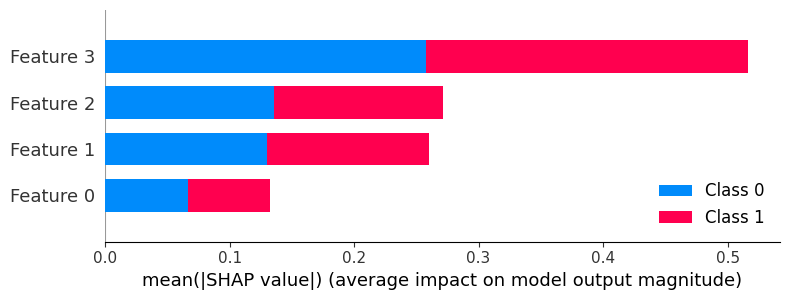

In [13]:
shap.summary_plot(shap_values, features=X, feature_names=)

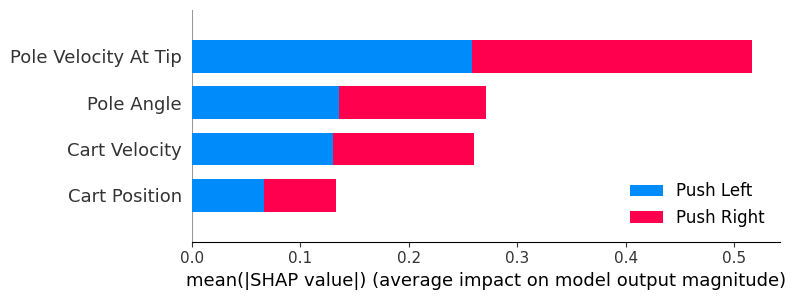

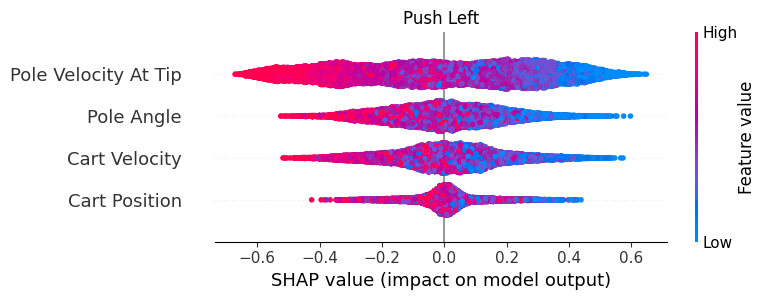

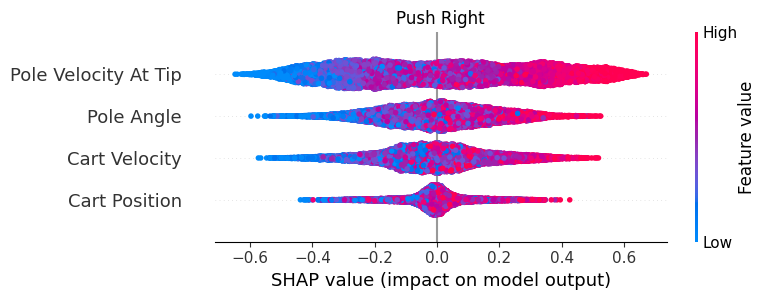

In [15]:
import matplotlib.pyplot as plt

# Assuming you already have shap_values and states from your previous steps

# Custom feature names corresponding to the CartPole-v0 observation space
custom_feature_names = ['Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Velocity At Tip']

# Custom action names corresponding to the CartPole-v0 action space
custom_action_names = ['Push Left', 'Push Right']  # You might not need this if you're not distinguishing SHAP values by action

# Create a summary plot with custom feature names
shap.summary_plot(shap_values, features=states, feature_names=custom_feature_names, class_names=custom_action_names)

# If you have separate SHAP values for different actions, you can create separate plots for each action
# This is just an illustrative example; you might not need this step if you have only one set of SHAP values
for i, action_shap_values in enumerate(shap_values):
    plt.figure()
    plt.title(custom_action_names[i])
    shap.summary_plot(action_shap_values, features=states, feature_names=custom_feature_names)